Парная линейная регрессия
Цель работы
    Познакомиться с моделью парной линейной регрессии регрессии и методом градиентного спуска.

Содержание работы
Найти оценки параметров модели парной линейной регрессии прямыми вычислениями и получить с помощью модели прогнозы результативного признака.
Найти оценки параметров модели парной линейной регрессии с использованием метода градиентного спуска.
Оценить качество построенной модели, сравнив на графике обучающую выборку и прогнозы.
Построить кривые обучения.

In [3]:
#Загрузим необходимые библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
#Исходные данные: x - расходы на рекламу, Y - объемы продаж
x = np.array([3, 5, 7, 6, 9])
Y = np.array([3, 7, 11, 14, 15])
display(x, Y)

array([3, 5, 7, 6, 9])

array([ 3,  7, 11, 14, 15])

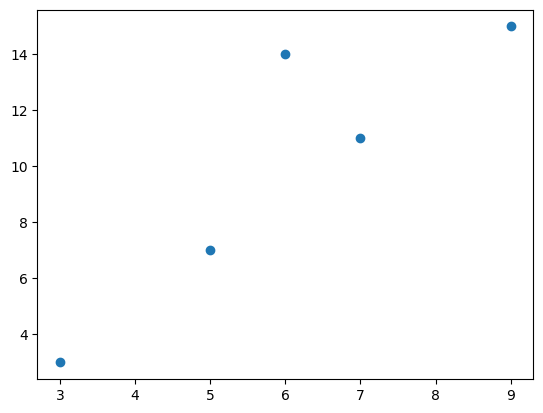

In [69]:
#Изобразим их на графике
plt.figure()
plt.scatter(x, Y)
plt.show()

In [70]:
#Вычислим оценки коэффициентов парной линейной регрессии по формулам
a1 = ((x - x.mean())*(Y - Y.mean())).mean()/((x - x.mean())**2).mean()
a0 = Y.mean() - a1*x.mean()
print("Модель линейной регрессии: Y^ = ", a0, " + ", a1, "* x")

Модель линейной регрессии: Y^ =  -2.0  +  2.0 * x


In [71]:
#Дадим серию прогнозов Y^ для x от 3 до 9 с шагом 1
x_space = np.linspace(3, 9, 7)
print(x_space)
Y_pred = a0 + a1*x_space
print(Y_pred)

[3. 4. 5. 6. 7. 8. 9.]
[ 4.  6.  8. 10. 12. 14. 16.]


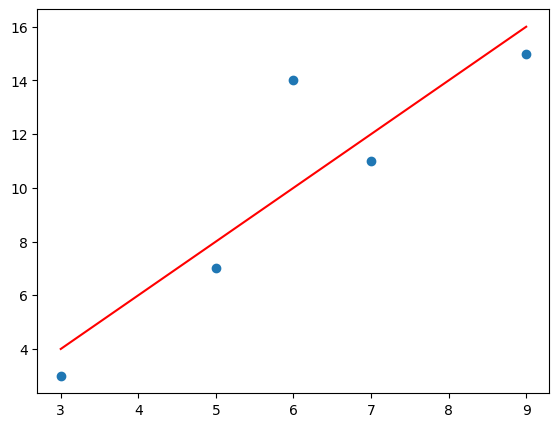

In [72]:
#Изобразим на графике исходные данные и прогнозы 
fig  = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
#ax.scatter(x_space, Y_pred)

In [81]:
#Реализуем шаг градиентного спуска в модели парной лдинейной регрессии
class SimpleRegression(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def fit(self, x, Y):
        alpha = 0.01
        dT_a0 = -2*(Y -self.predict(x)).mean()
        dT_a1 = -2*((Y -self.predict(x))*x).mean()
        self.a0 -= alpha*dT_a0
        self.a1 -= alpha*dT_a1

MSE после инициализации: 120.0


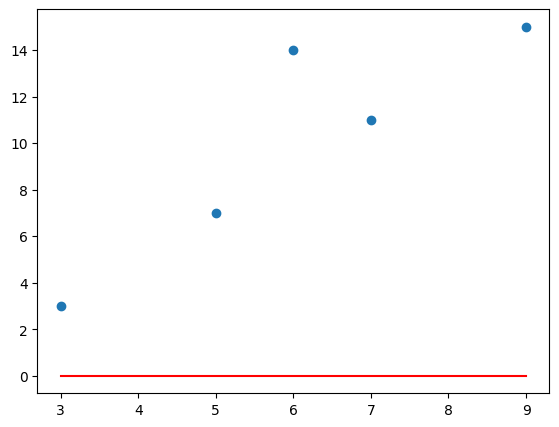

In [82]:
#Получим прогнозы до градиентного спуска с начальными значениями параметров
regr = SimpleRegression()
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')


print(f"MSE после инициализации: {regr.MSE(x, Y)}")

MSE после инициализации: 4.486778185013684


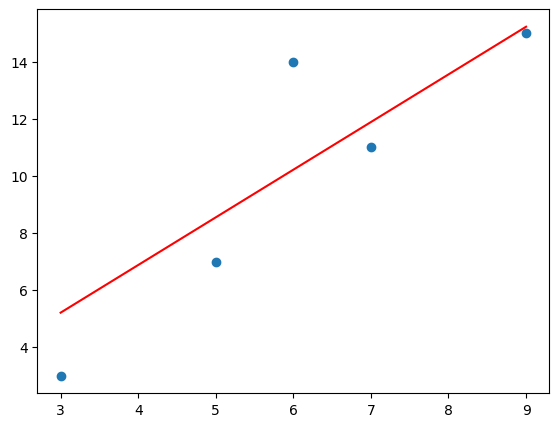

In [92]:
#Выведем прогнозы до градиентного спуска на графике
regr.fit(x, Y)
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
print(f"MSE после инициализации: {regr.MSE(x, Y)}")

MSE после первого шага градиентного спуска:  1.1817555394388603e+18


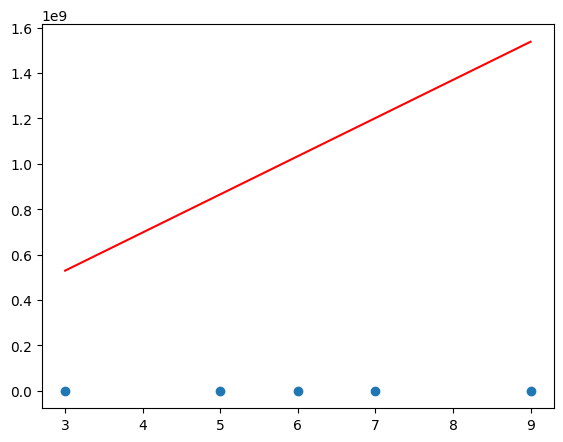

In [37]:
#Реализуем шаг градиентного спуска
regr.fit(x, Y)
print("MSE после первого шага градиентного спуска: ", regr.MSE(x, Y))
Y_pred = regr.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

In [94]:
#Реализуем цикл градиентного спуска
class SimpleRegression2(object):
    def __init__(self):
        self.a0 = 0
        self.a1 = 0
    def predict(self, x):
        return self.a0 + self.a1*x
    def MSE(self, x, Y):
        return ((Y - self.predict(x))**2).mean()
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    def fit(self, x, Y, alpha = 0.001, epsylon = 0.01, max_steps = 5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dT_a0 = -2*(Y -self.predict(x)).mean()
            dT_a1 = -2*((Y -self.predict(x))*x).mean()
            self.a0 -= alpha*dT_a0
            self.a1 -= alpha*dT_a1
            new_error = self.MSE(x, Y)
            step += 1
            steps.append(step)
            errors.append(new_error)
            if new_error < epsylon:
                break
        return a0, a1, steps, errors

Y^ = -2.0 + 2.0*x
MSE после инициализации: 4.000000000000001


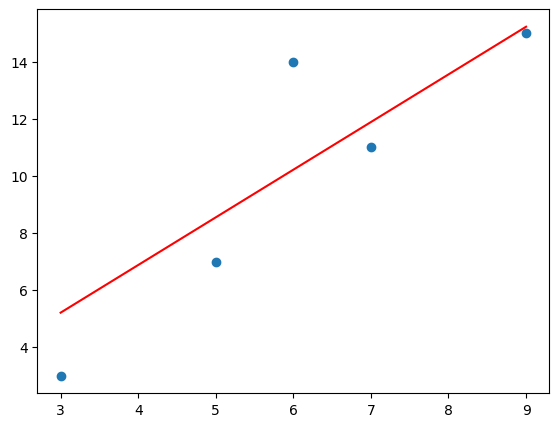

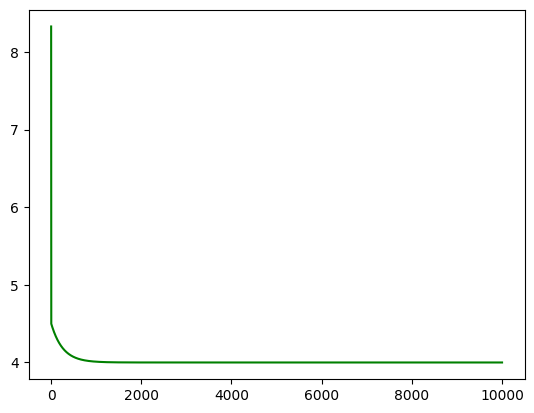

In [99]:
#Запустим цикл градиентного спуска с заданной точностью 5
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.01, epsylon = 0.001, max_steps=10000)
print(f"Y^ = {a0new} + {a1new}*x")
Y_pred2 = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')
print(f"MSE после инициализации: {regr2.MSE(x, Y)}")

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

4.000000003881773
8.000000001754989
11.999999999628205
10.000000000691596
15.999999997501419
MSE после градиентного спуска:  4.000000000000001


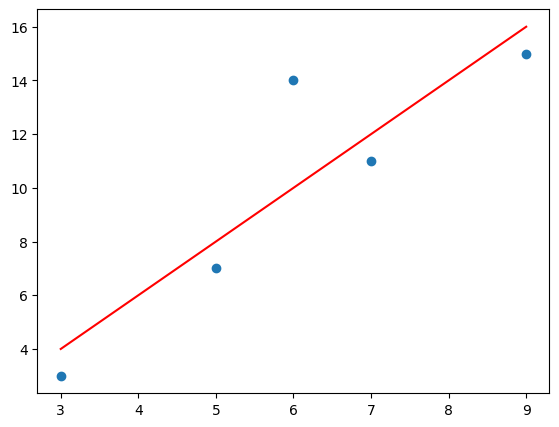

In [100]:
#Выведем график  прогнозов и вычислим MSE
print(regr2.predict(3))
print(regr2.predict(5))
print(regr2.predict(7))
print(regr2.predict(6))
print(regr2.predict(9))
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

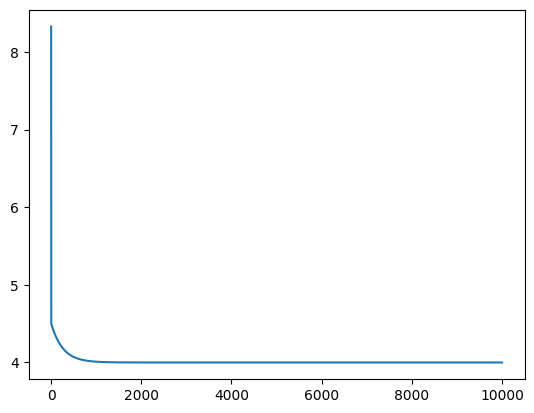

In [101]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

In [103]:
#Запустим цикл градиентного спуска с заданной точностью 0.05
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.001, epsylon = 0.05)

MSE после градиентного спуска:  4.071585211511637


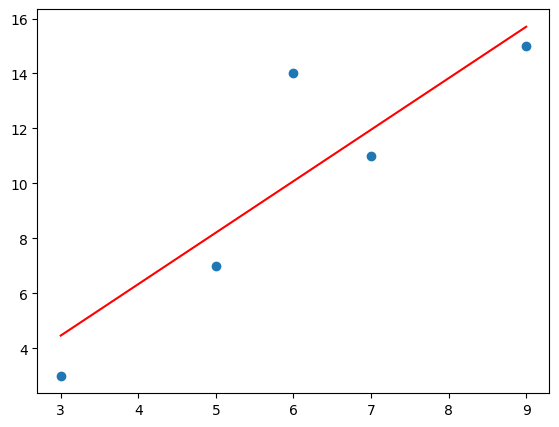

In [104]:
#Выведем график прогнозов и вычислим MSE
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
fig = plt.figure()
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])
ax.scatter(x, Y)
ax.plot(x_space, Y_pred, 'r')

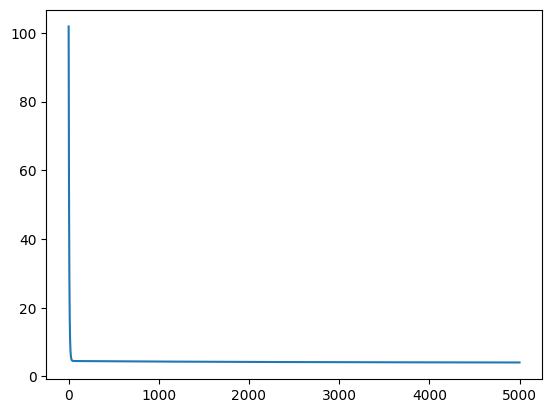

In [105]:
#Выведем график изменения MSE в процессе градиентного спуска
plt.figure()
plt.plot(steps, errors)

MSE после градиентного спуска:  4.416286681058598


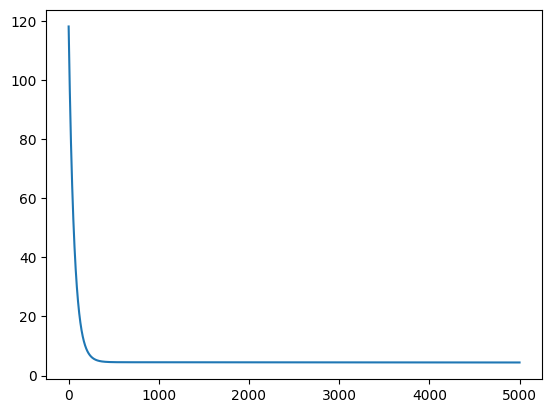

In [107]:
#Запустим цикл градиентного спуска с разными значениями скорости обучения alpha=0.0001, 0.01, 0.1, 1, 10, ..., 
#с различной допукстимой точностью epsylon = 0.001, 0.5, 5, с различным максимальным количеством шагов max_steps
regr2 = SimpleRegression2()
a0new, a1new, steps, errors = regr2.fit(x, Y, alpha = 0.0001, epsylon = 0.01, max_steps = 5000)
print("MSE после градиентного спуска: ", regr2.MSE(x, Y))
Y_pred = regr2.predict(x_space)
plt.figure()
plt.plot(steps, errors)

Загрузите файл Video Games.csv (с помощью pd.read_csv). 

Для 11 703 компьютерных игр известны платформа, год выхода, жанр, платформа, издатель, объемы продаж игры - отдельно для Северной Америки, Европы, Японии и других регионов.

В обучающей выборке для каждой игры известны следующие поля:

Name — название игры;
Platform — платформа (PC; DS; GBA; PS; PS2; PS3; PSP; Wii; XB или X360);
Year_of_Release — год выпуска;
Genre — жанр (Action; Adventure; Fighting; Platform; Puzzle; Racing; Role-Playing; Shooter; Simulation; Sports или Strategy; Misc означает все остальные жанры);
Publisher — издатель;
NA_Sales — объемы продаж игры в Северной Америке (в млн долл. США);
EU_Sales — объемы продаж игры в Европе(в млн долл. США);
Other_Sales — объемы продаж игры в других регионах (в млн долл. США);
Critic_Score — сумма оценок, данных игре штатными критиками сайта Metacritic;
Critic_Count — количество штатных критиков, давших оценки игре;
User_Score — сумма оценок, данных игре игры пользователями сайта Metacritic;
User_Count — количество пользователей, давших оценки;
Developer — разработчик;
Rating — рейтинг игры (AO — только для взрослых; 18+ M — только для лиц старше 18 лет; 17+ — только для лиц старше 17 лет; E10+ — для всех старше 10 лет; E — для всех; EC — для детей младшего возраста; RP — рейтинг не присвоен);
JP_Sales — объемы продаж игры в Японии (в млн долл. США).

Требуется построить модель, предсказывающую объем продаж игры в Японии. 

Япония - достаточно специфичная страна с точки зрения индустрии развлечений. К тому же государство активно защищает своих производителей, что не способствует импорту. Перед издателями компьютерных игр всегда стоит вопрос: стоит ли игру переводить, подгонять под местный менталитет и платить для входа на японский рынок. Чтобы это понять, следует оценить, на какой кусок пирога можно вообще в Японии рассчитывать. Один из вариантов это сделать – по истории продаж в других регионах. Если игра еще в разработке, за историю продаж можно считать прогнозы: Европа и Америка не такие непредсказуемые рынки, как Япония.

Выберите в качестве результативного признака JP_Sales. В качестве факторных признаков выберите все числовые признаки. Также можно для категориальных признаков (Platform, Genre, возможно, Publisher) ввести индикаторы (с помощью sklearn.preprocessing.OneHotEncoder).

Вычислите определитель матрицы (x_T*x).

Вычислите вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.

На основе класса SimpleRegression (в котором x - это одномерный массив значений факторного признака) создайте класс MultipleRegression, который реализует градиентный спуск для случая, когда x является двумерным массивом, содержащим в каждой строке (для кафдой компьютерной игры) значения нескольких факторных признаков.

Обучите модель с помощью метода MultipleRegression.fit, дайте прогнозы JP_Sales^ для каждой игры с помощью MultipleRegression.predict, вычислите ошибки MAE и MAPE.

Попробуйте расширить набор факторных признаков, добавив логарифмы, квадраты, кубы

In [4]:
from sklearn.preprocessing import OneHotEncoder

videogames = pd.read_csv(r"Video_Games.csv", index_col = 'id')
videogames.head()
Y = videogames['jp_sales']

x = videogames.drop('jp_sales', axis=1)

x = pd.concat([x, pd.get_dummies(x['platform'], drop_first=True, dtype = float),
                pd.get_dummies(x['genre'], drop_first=True, dtype = float),
                pd.get_dummies(x['publisher'], drop_first=True, dtype = float)], axis = 1)
ohe = OneHotEncoder()

# x = pd.concat([x, ohe.fit_transform(x['platform']), ohe.fit_transform(x['genre']), ohe.fit_transform(x['publisher'])])

x = x.drop(['platform', 'genre', 'publisher'], axis = 1)

Y.head()
x.head()
x_ = x
x_.insert(0, "intercept", np.ones((x.shape[0],1)), allow_duplicates=True)                
x_ = x_.sort_index()
x.shape[0]

4258

In [ ]:
x_

In [5]:
Y.sort_index()

id
2       1.03
3       1.32
5       1.05
6       1.01
8       1.01
        ... 
6077    1.02
6079    2.07
6080    1.02
6081    1.04
6083    1.28
Name: jp_sales, Length: 4258, dtype: float64

In [1]:
class MultipleRegression(object):
    def __init__(self, x, Y):
        # self.aCoeff = np.linalg.inv(x.T.dot(x)).dot(x.T).dot(Y)
        self.weights = None
    def printA(self):
        print(self.aCoeff)

    def printWeights(self):
        print(self.weights)

    def predict(self, x):
        ones = np.ones(len(x))
        features = np.c_[ones, x]
        y_predicted = np.dot(features, self.weights.T)
        return y_predicted

    def gradient(self, x, Y, features):
        y_pred = np.dot(features, self.weights.T)
        error = y_pred - Y
        grad = 2 * np.dot(features.T, error) / len(Y)
        return grad
    
    def MSE(self, x, Y):
        y_pred = np.dot(x, self.aCoeff)
        mse = np.mean((Y - y_pred) ** 2)
        return mse
    
    def MAE(self, x, Y):
        return abs(Y - self.predict(x)).mean()
    
    def MAPE(self, x, Y):
        return abs((Y - self.predict(x))/Y).mean()
    
    def fit1(self, x, Y, max_steps = 1000, lr=1e-10):
        n_samples = len(Y)
        ones = np.ones(len(x))
        features = np.c_[ones, x]
        self.weights = np.zeros(features.shape[1])
        print([len(features), len(features[0])])
        for i in range(max_steps):
            y_predicted = np.dot(features, self.weights.T)
            error = y_predicted - Y
            print(f"Error: {error}")
            dw = self.gradient(x, Y, features)
            self.weights -= lr * dw

In [ ]:
#Вычислим определитель (x_T*x).
x_dropped = x_.drop(x_.loc[2:5633].index)
# x_dropped
det = x_.T.dot(x_)
# det = x_.T * x
det

In [ ]:
#Вычислим вектор оценок коэффициентов по формуле a^ = (x_T*x)^(-1)*x_T*Y.
a = np.linalg.inv(x_.T.dot(x_)).dot(x_.T).dot(Y)
a

In [5]:
mregr = MultipleRegression(x_, Y)
mregr.printWeights()
# len(mregr.aCoeff)

None


In [ ]:
mregr.fit1(np.array(x_), np.array(Y), max_steps=10000)
mregr.printWeights()

In [7]:
mregr.predict(x_)

array([1.21471945, 1.21411478, 1.21290554, ..., 1.21653333, 1.20806852,
       1.20927768])

In [8]:
mregr.MAE(x_, Y)

0.22932213052185096

In [9]:
mregr.MAPE(x_, Y)

0.1575366780630756